<strong style="font-size: 125%">第三单元：数据勘探和数据可视化</strong>
<br><br>

这一个单元我们对数据勘探和数据可视化做一个简介。对于任何一个机器学习项目，最关键的一步是要熟悉手头的数据，对每一个变量以及变量之间的关系做一些初步的了解。数据可视化是了解数据的一个非常重要的工具。

我们用Lending Club的贷款数据作为例子对数据可视化做一些基本的介绍。

Lending Club是一家位于美国的P2P网上借贷公司，投资者为潜在的借款人提供资金，而投资者根据借款人的信息承担一定风险从而来获利。Lending Club为投资者和借款人之间提供了一座“桥梁”。Lending Club将历年以来借贷款的数据全部公开，这为我们研究消费者借贷和风控提供了一个很好的数据来源。
<br><br>
<div>
    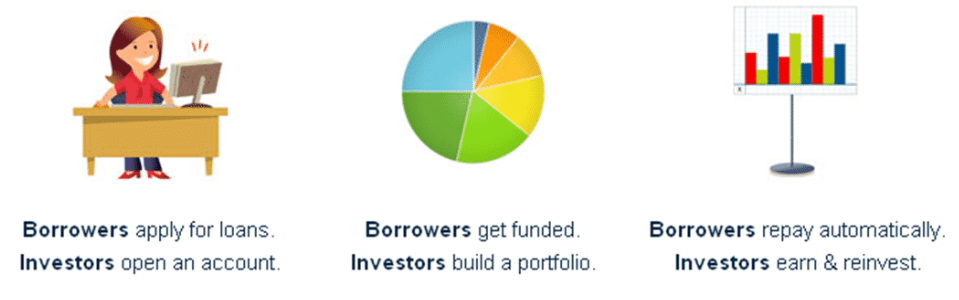
</div>


In [1]:
import csv
with open('/home/nbuser/library/lending_club_train.csv', 'r') as f:
    reader = csv.reader(f)
    lending_club_train = list(reader)

In [2]:
lending_club_train[:5]

[['16000',
  ' 60 months',
  '12.74',
  '361.93',
  'C',
  'C1',
  '10+ years',
  'MORTGAGE',
  '130000.0',
  'Not Verified',
  'debt_consolidation',
  '8.28',
  '0.0',
  'Fully Paid',
  'Mar-2017'],
 ['11875',
  ' 36 months',
  '11.44',
  '391.26',
  'B',
  'B4',
  '10+ years',
  'MORTGAGE',
  '55000.0',
  'Not Verified',
  'home_improvement',
  '34.5',
  '0.0',
  'Current',
  'Mar-2017'],
 ['26000',
  ' 60 months',
  '15.99',
  '632.14',
  'C',
  'C5',
  '10+ years',
  'RENT',
  '52000.0',
  'Source Verified',
  'debt_consolidation',
  '20.49',
  '0.0',
  'Current',
  'Mar-2017'],
 ['35000',
  ' 36 months',
  '19.99',
  '1300.55',
  'D',
  'D4',
  '10+ years',
  'MORTGAGE',
  '80000.0',
  'Source Verified',
  'debt_consolidation',
  '10.65',
  '1.0',
  'Current',
  'Mar-2017'],
 ['14000',
  ' 60 months',
  '12.74',
  '316.69',
  'C',
  'C1',
  '4 years',
  'OWN',
  '40000.0',
  'Not Verified',
  'credit_card',
  '17.48',
  '0.0',
  'Current',
  'Mar-2017']]

我们现将Lending Club 数据依次读入一系列列表，每个列表代表一个变量

In [3]:
loan_amnt = [int(x[0]) for x in lending_club_train]
term = [x[1] for x in lending_club_train]
int_rate = [float(x[2]) for x in lending_club_train]
installment = [x[3] for x in lending_club_train]
grade = [x[4] for x in lending_club_train]
sub_grade = [x[5] for x in lending_club_train]
emp_length = [x[6] for x in lending_club_train]
home_ownership = [x[7] for x in lending_club_train]
annual_income = [float(x[8]) for x in lending_club_train]
verification_status = [x[9] for x in lending_club_train]
purpose = [x[10] for x in lending_club_train]
dti = [-99999 if x[11]=='' else float(x[11]) for x in lending_club_train]
delinq_2yrs = [x[12] for x in lending_club_train]
loan_status = [x[13] for x in lending_club_train]
issue_d = [x[14] for x in lending_club_train]

数据可视化和数据勘探包括下面几个基本步骤：
1. 了解每个变量的分布
2. 了解每个自变量和应变量之间的关系
3. 了解自变量之间的关系

<strong>了解每个变量的分布</strong>
<br>
频率直方图是了解每个变量分布的一种非常常用和有效的方法。我们在上一个单元中已对频率直方图有所介绍。频率直方图可以分为以下两种：
1. 连续变量的频率直方图
2. 离散变量的频率直方图

下面是一个通用的连续变量频率直方图的Python实现方法。

In [4]:
import matplotlib.pyplot as plt
from collections import Counter
import math

def bucketize(point, bucket_size):
    return bucket_size * math.floor(point / bucket_size)

def make_histogram(points, bucket_size):
    return Counter(bucketize(point, bucket_size) for point in points)

def plot_histogram(points, bucket_size, title=""):
    histogram = make_histogram(points, bucket_size)
    plt.bar(histogram.keys(), histogram.values(), width=bucket_size)
    plt.title(title)
    plt.show()

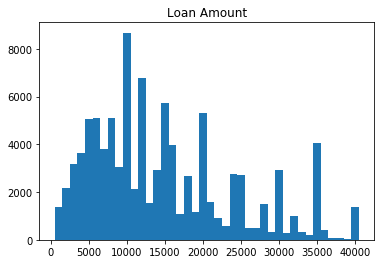

In [5]:
plot_histogram(loan_amnt, 1000, title = "Loan Amount")

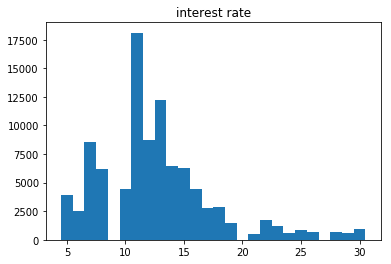

In [6]:
plot_histogram(int_rate, 1, title = "interest rate")

下面是一个通用的离散变量频率直方图的Python实现方法。

In [7]:
import matplotlib.pyplot as plt
from collections import Counter
def plot_barchart(points, title="", rotation = 0):
    counter = Counter(points)
    
    #categories = counter.keys()
    #categories_count = counter.values()
    sorted_counter = sorted(counter.items(), key = lambda item: item[0])
    categories = [item[0] for item in sorted_counter]
    categories_count = [item[1] for item in sorted_counter]
    xs = [i for i, _ in enumerate(categories)]
    plt.bar(xs, categories_count)
    plt.title(title)
    plt.xticks([i for i, _ in enumerate(categories)], categories, rotation = rotation)
    plt.show()

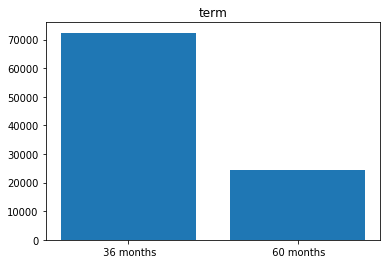

In [8]:
plot_barchart(term, title = "term")

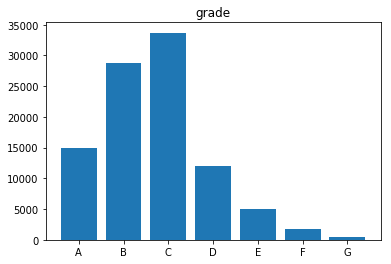

In [9]:
plot_barchart(grade, title = "grade")

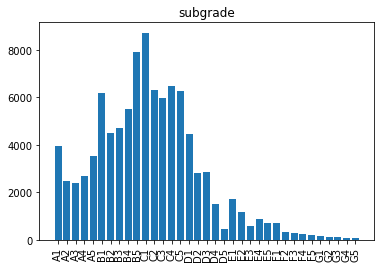

In [10]:
plot_barchart(sub_grade, title = "subgrade", rotation = 90)

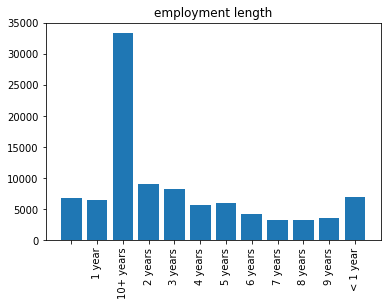

In [11]:
plot_barchart(emp_length, title = "employment length", rotation = 90)

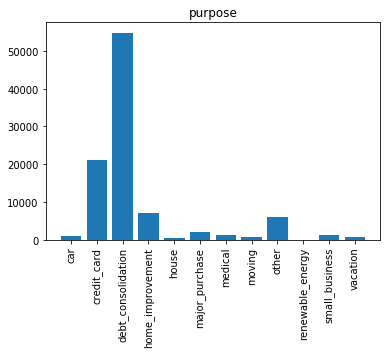

In [12]:
plot_barchart(purpose, title = "purpose", rotation = 90)

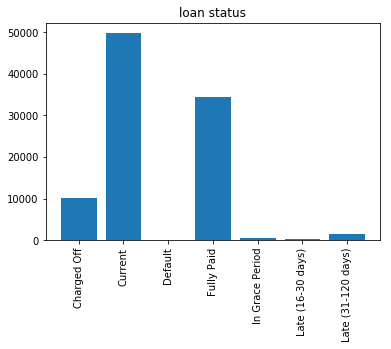

In [13]:
plot_barchart(loan_status, title = "loan status", rotation = 90)

以上是Loan Status的分布图，我们可以基于Loan Status来定义我们所关心的应变量。接下去的几个单元我们会围绕如何用Lending Club的数据来预测这个应变量。

In [14]:
dep_var = [1 if x in ("Charged Off", "Default") else 0 for x in loan_status]

In [15]:
def mean(v):
    return sum(v) / len(v)

In [16]:
mean(dep_var)

0.105828743839056

<strong>了解每个自变量和应变量之间的关系</strong>
<br>
有了应变量之后，我们需要对每个自变量做进一步的分析来了解它和应变量之间的关系，这也可以分成两种情况：
1. 连续自变量和应变量的关系。我们可以用散点图来表示这种关系，上个单元已对散点图有所介绍。
2. 离散自变量和应变量的关系。我们可以用柱状图来表示这种关系。下面我们对于如何绘制自变量-应变量的柱状图做一简介。

In [17]:
import matplotlib.pyplot as plt
from collections import defaultdict
def plot_binary_var_by_group(list_x, list_y, title="", rotation = 0, figsize = (6,4)):
    y_by_x  = defaultdict(list)
    AveDepVar_by_x = defaultdict(float)
    data_xy = zip(list_x, list_y)
    for x, y in data_xy:
        y_by_x[x].append(y)
    AveDepVar_by_x = {x: mean(y_by_x[x]) for x in y_by_x}
    AveDepVar_by_x = sorted(AveDepVar_by_x.items(), key = lambda item: item[0])
    categories = [item[0] for item in AveDepVar_by_x]
    AveDepVar = [item[1] for item in AveDepVar_by_x]
    plt.figure(figsize=figsize)
    plt.bar(categories, AveDepVar)
    plt.title(title)
    plt.xticks([i for i, _ in enumerate(categories)], categories, rotation = rotation)
    plt.show()

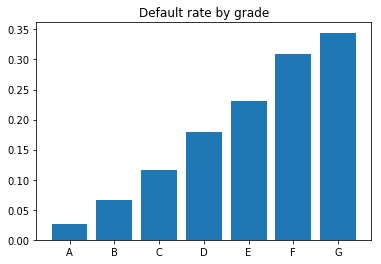

In [18]:
plot_binary_var_by_group(grade, dep_var, "Default rate by grade")

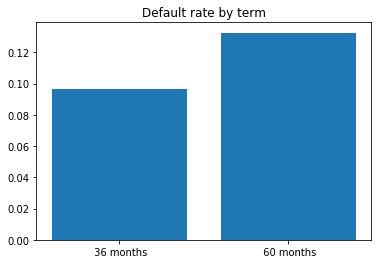

In [19]:
plot_binary_var_by_group(term, dep_var, "Default rate by term")

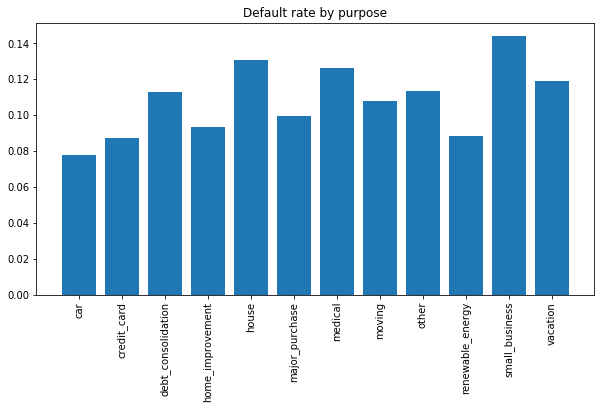

In [20]:
plot_binary_var_by_group(purpose, dep_var, "Default rate by purpose", rotation = 90, figsize = (10,5))

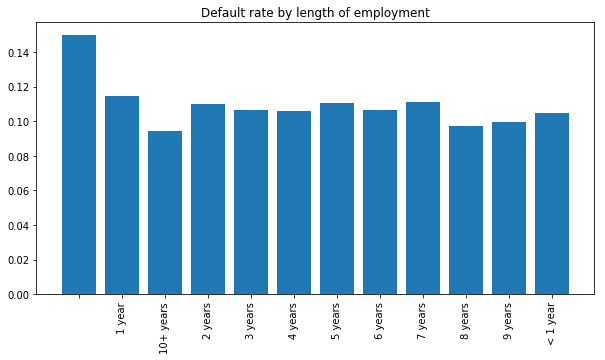

In [21]:
plot_binary_var_by_group(emp_length, dep_var, "Default rate by length of employment", rotation = 90, figsize = (10,5))

In [22]:
dti_2 = []
for x in dti:
    if x < 0:
        dti_2.append('A: missing')
    elif x < 10:
        dti_2.append('B: <10')     
    elif x < 20:
        dti_2.append('C: 10-20')
    elif x < 30:
        dti_2.append('D: 20-30')
    else:
        dti_2.append('E: >30')
        

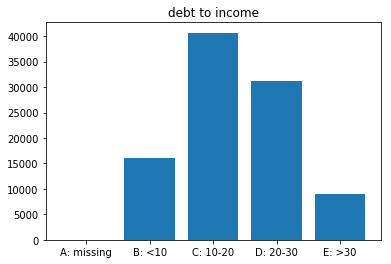

In [23]:
plot_barchart(dti_2, title = "debt to income")

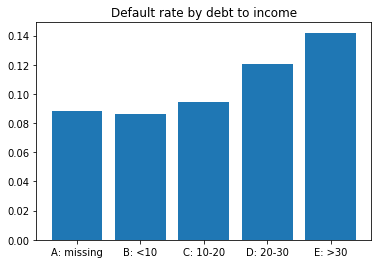

In [24]:
plot_binary_var_by_group(dti_2, dep_var, "Default rate by debt to income")

In [25]:
income_2 = []
for x in annual_income:
    if x < 50000:
        income_2.append('A: <$50K')
    elif x < 100000:
        income_2.append('B: $50-100K')
    elif x < 150000:
        income_2.append('C: $100-150K')
    elif x < 200000:
        income_2.append('D: $150-200K')
    else:
        income_2.append('E: >$200K')

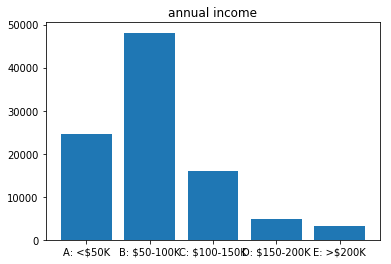

In [26]:
plot_barchart(income_2, title = "annual income")

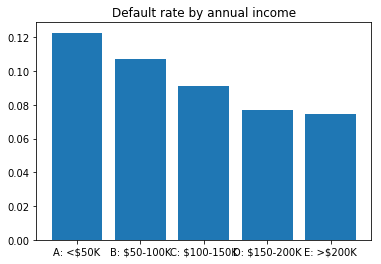

In [27]:
plot_binary_var_by_group(income_2, dep_var, "Default rate by annual income")

In [28]:
loan_amnt_2 = []
for x in loan_amnt:
    if x < 5000:
        loan_amnt_2.append('A: <$5K')
    elif x < 10000:
        loan_amnt_2.append('B: $5-10K')
    elif x < 15000:
        loan_amnt_2.append('C: $10-15K')
    elif x < 20000:
        loan_amnt_2.append('D: $15-20K')
    elif x < 30000:
        loan_amnt_2.append('E: $20-30K')
    else:
        loan_amnt_2.append('E: >$30K')

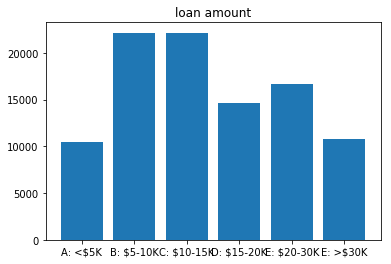

In [29]:
plot_barchart(loan_amnt_2, title = "loan amount")

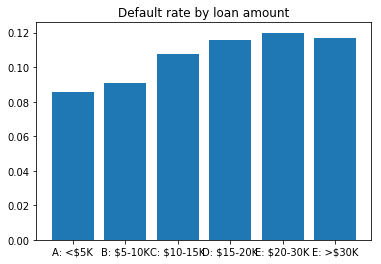

In [30]:
plot_binary_var_by_group(loan_amnt_2, dep_var, "Default rate by loan amount")

<strong>了解自变量之间的关系</strong>
<br>
了解自变量之间的关系对于一个机器学习的项目也是非常重要的。这可以帮助我们选择合适的变量来建立机器学习模型。下面我们用loan_amnt, grade和int_rate来讲解如何分析自变量之间的关系

In [31]:
lending_club_data = [[loan_amnt[x], grade[x], int_rate[x]] for x in range(len(loan_amnt))]

In [32]:
import random
index = random.sample(range(len(lending_club_data)), 100)
data = [lending_club_data[x] for x in index]

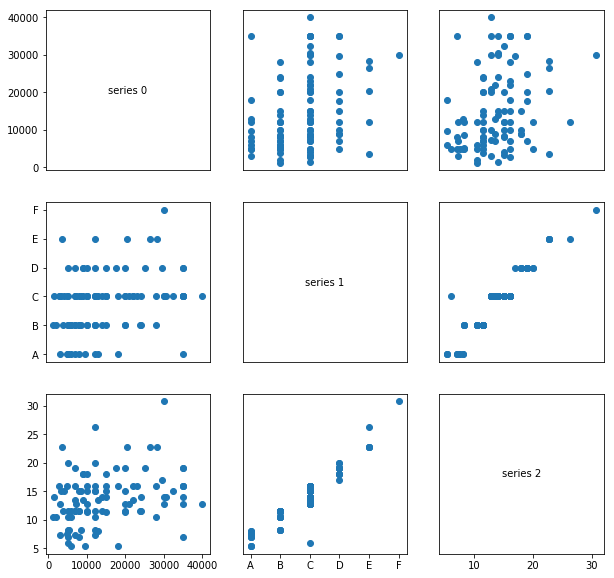

In [33]:
import matplotlib.pyplot as plt 

def get_column(A, j): 
    return [A_i[j] for A_i in A]

num_columns = len(data[0])

fig, ax = plt.subplots(num_columns, num_columns, figsize = (10,10)) 
for i in range(num_columns):
    for j in range(num_columns):
        if i != j: 
            ax[i][j].scatter(get_column(data, j), get_column(data, i))
        else: ax[i][j].annotate("series " + str(i), (0.5, 0.5), xycoords='axes fraction', ha="center", va="center")
            
        if i < num_columns - 1: ax[i][j].xaxis.set_visible(False) 
        if j > 0: ax[i][j].yaxis.set_visible(False)
ax[-1][-1].set_xlim(ax[0][-1].get_xlim()) 
ax[0][0].set_ylim(ax[0][1].get_ylim())
plt.show()